# Model Training

In [1]:
import os
import glob
import shutil
from collections import Counter
import random
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image

!pip install -U -q ultralytics clearml
from ultralytics import YOLO
from clearml import Task

In [2]:
os.chdir('../')

In [3]:
# Getting the image shape count of all the images
img_list = glob.glob('datasets/images/*/*/*')
shape = []
for i in img_list:
    shape.append(plt.imread(i).shape[:2])
Counter(shape)

Counter({(512, 512): 267,
         (384, 512): 75,
         (306, 512): 6,
         (382, 512): 15,
         (512, 384): 33,
         (252, 512): 1,
         (512, 289): 3,
         (289, 512): 4,
         (340, 512): 5,
         (288, 512): 4,
         (512, 382): 17,
         (387, 512): 1,
         (471, 512): 1,
         (356, 512): 1,
         (512, 288): 1,
         (381, 512): 1,
         (341, 512): 6,
         (512, 306): 2,
         (512, 383): 1,
         (512, 287): 2,
         (366, 512): 1,
         (512, 511): 1,
         (512, 339): 1,
         (512, 341): 1,
         (511, 512): 1,
         (307, 512): 1,
         (342, 512): 1,
         (344, 512): 1,
         (358, 512): 1})

## 1. 10% Data from 5 Classes

Creating the yaml file for the yolo training.

In [4]:
%%writefile train_config.yaml
# path to the dataset
path: '../../datasets'
train: 'images/train'
val: 'images/val'

# Classes details
nc: 5
names: ['chicken_curry', 'chocolate_cake', 'hamburger', 'pizza', 'ramen']

Overwriting train_config.yaml


### Experiment No. 1 - Yolov8 Nano Model

#### Model Training

In [5]:
# Setting up clearml task
task = Task.init(project_name='food_image_seg', task_name='exp1_yolov8n_5class_10percent')

# Loading the model
model = YOLO('yolov8n-seg.pt')

# Training the yolo model
results = model.train(data='train_config.yaml',
                      imgsz=512, 
                      epochs=200, 
                      patience=20,
                      project='train_logs_5class_10percent',
                      name='exp1_yolov8n_5class_10percent')

# Closing the clearml task
task.close()

ClearML Task: created new task id=36bcf88bbfc14576b6d1304d899329b0
2023-05-02 14:47:45,937 - clearml.Task - INFO - Storing jupyter notebook directly as code
ClearML results page: https://app.clear.ml/projects/46d5eb6759034db9b71c9a0c37c982f4/experiments/36bcf88bbfc14576b6d1304d899329b0/output/log


  0%|          | 0.00/6.73M [00:00<?, ?B/s]

Ultralytics YOLOv8.0.91 🚀 Python-3.9.16 torch-1.12.1+cu116 CUDA:0 (Quadro P5000, 16279MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=train_config.yaml, epochs=200, patience=20, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=train_logs_5class_10percent, name=exp1_yolov8n_5class_10percent, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False,

AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


  0%|          | 0.00/6.23M [00:00<?, ?B/s]

AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias
train: Scanning /notebooks/datasets/labels/train/chicken_curry.cache... 334 images, 0 backgrounds, 0 corrupt: 100%|██████████| 334/334 [00:00<?, ?it/s]
val: Scanning /notebooks/datasets/labels/val/chicken_curry.cache... 121 images, 0 backgrounds, 0 corrupt: 100%|██████████| 121/121 [00:00<?, ?it/s]
Plotting labels to train_logs_5class_10percent/exp1_yolov8n_5class_10percent/labels.jpg... 
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to train_logs_5class_10percent/exp1_yolov8n_5class_10percent
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/200      1.76G      0.988      3.331      3.329      1.356         45        512: 100%|██████████| 21/21 [00:07<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]
                   all        121        122    0.00349          1      0.246      0.189    0.00347      0.992      0.242      0.182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
      2/200      1.71G     0.7967      1.637      3.092      1.204         43        512: 100%|██████████| 21/21 [00:05<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]
                   all        121        122    0.00366      0.983      0.263      0.186    0.00364      0.975      0.248       0.17

      E

2023-05-02 15:03:36,108 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/food_image_seg/exp1_yolov8n_5class_10percent.36bcf88bbfc14576b6d1304d899329b0/models/best.pt


#### Model Training Result

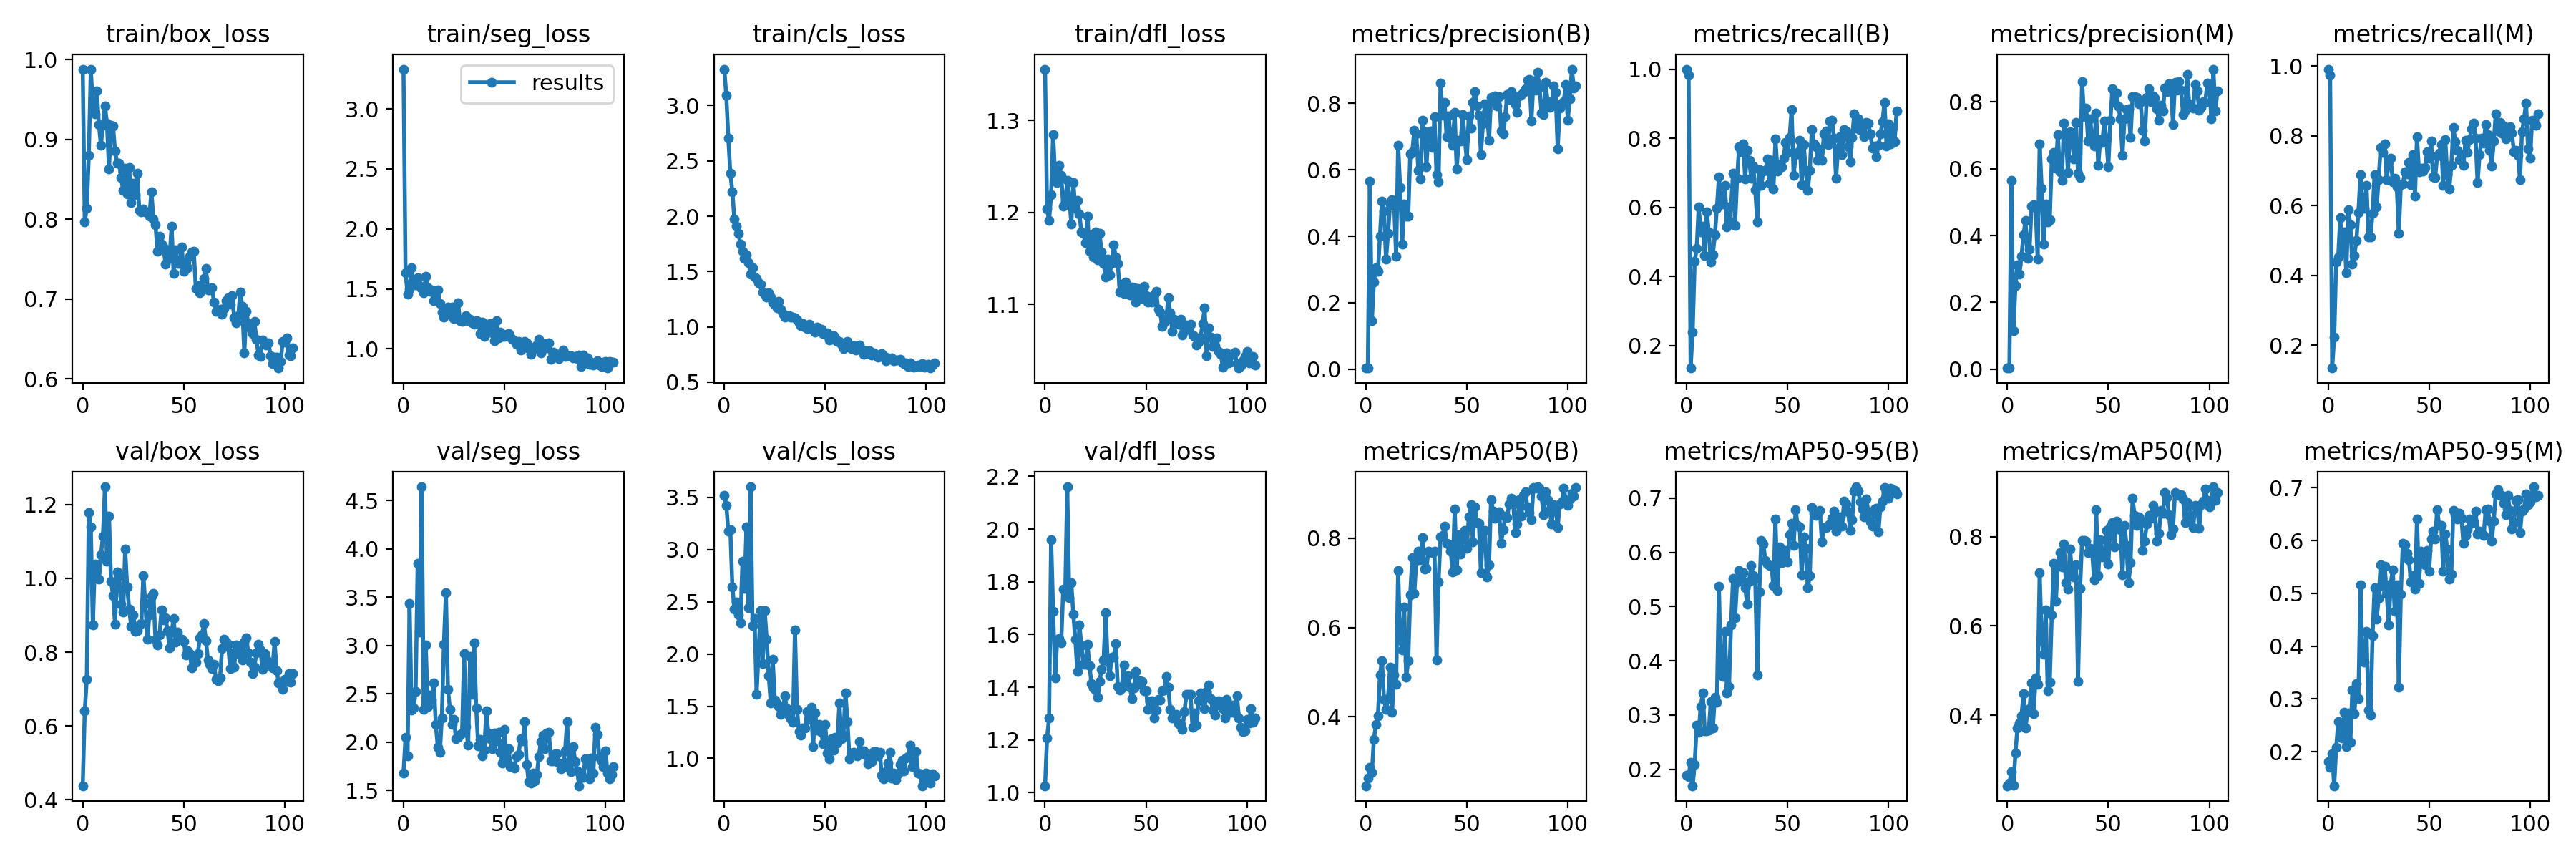

In [16]:
# Visualizing the result image
Image('train_logs_5class_10percent/exp1_yolov8n_5class_10percent/results.png')

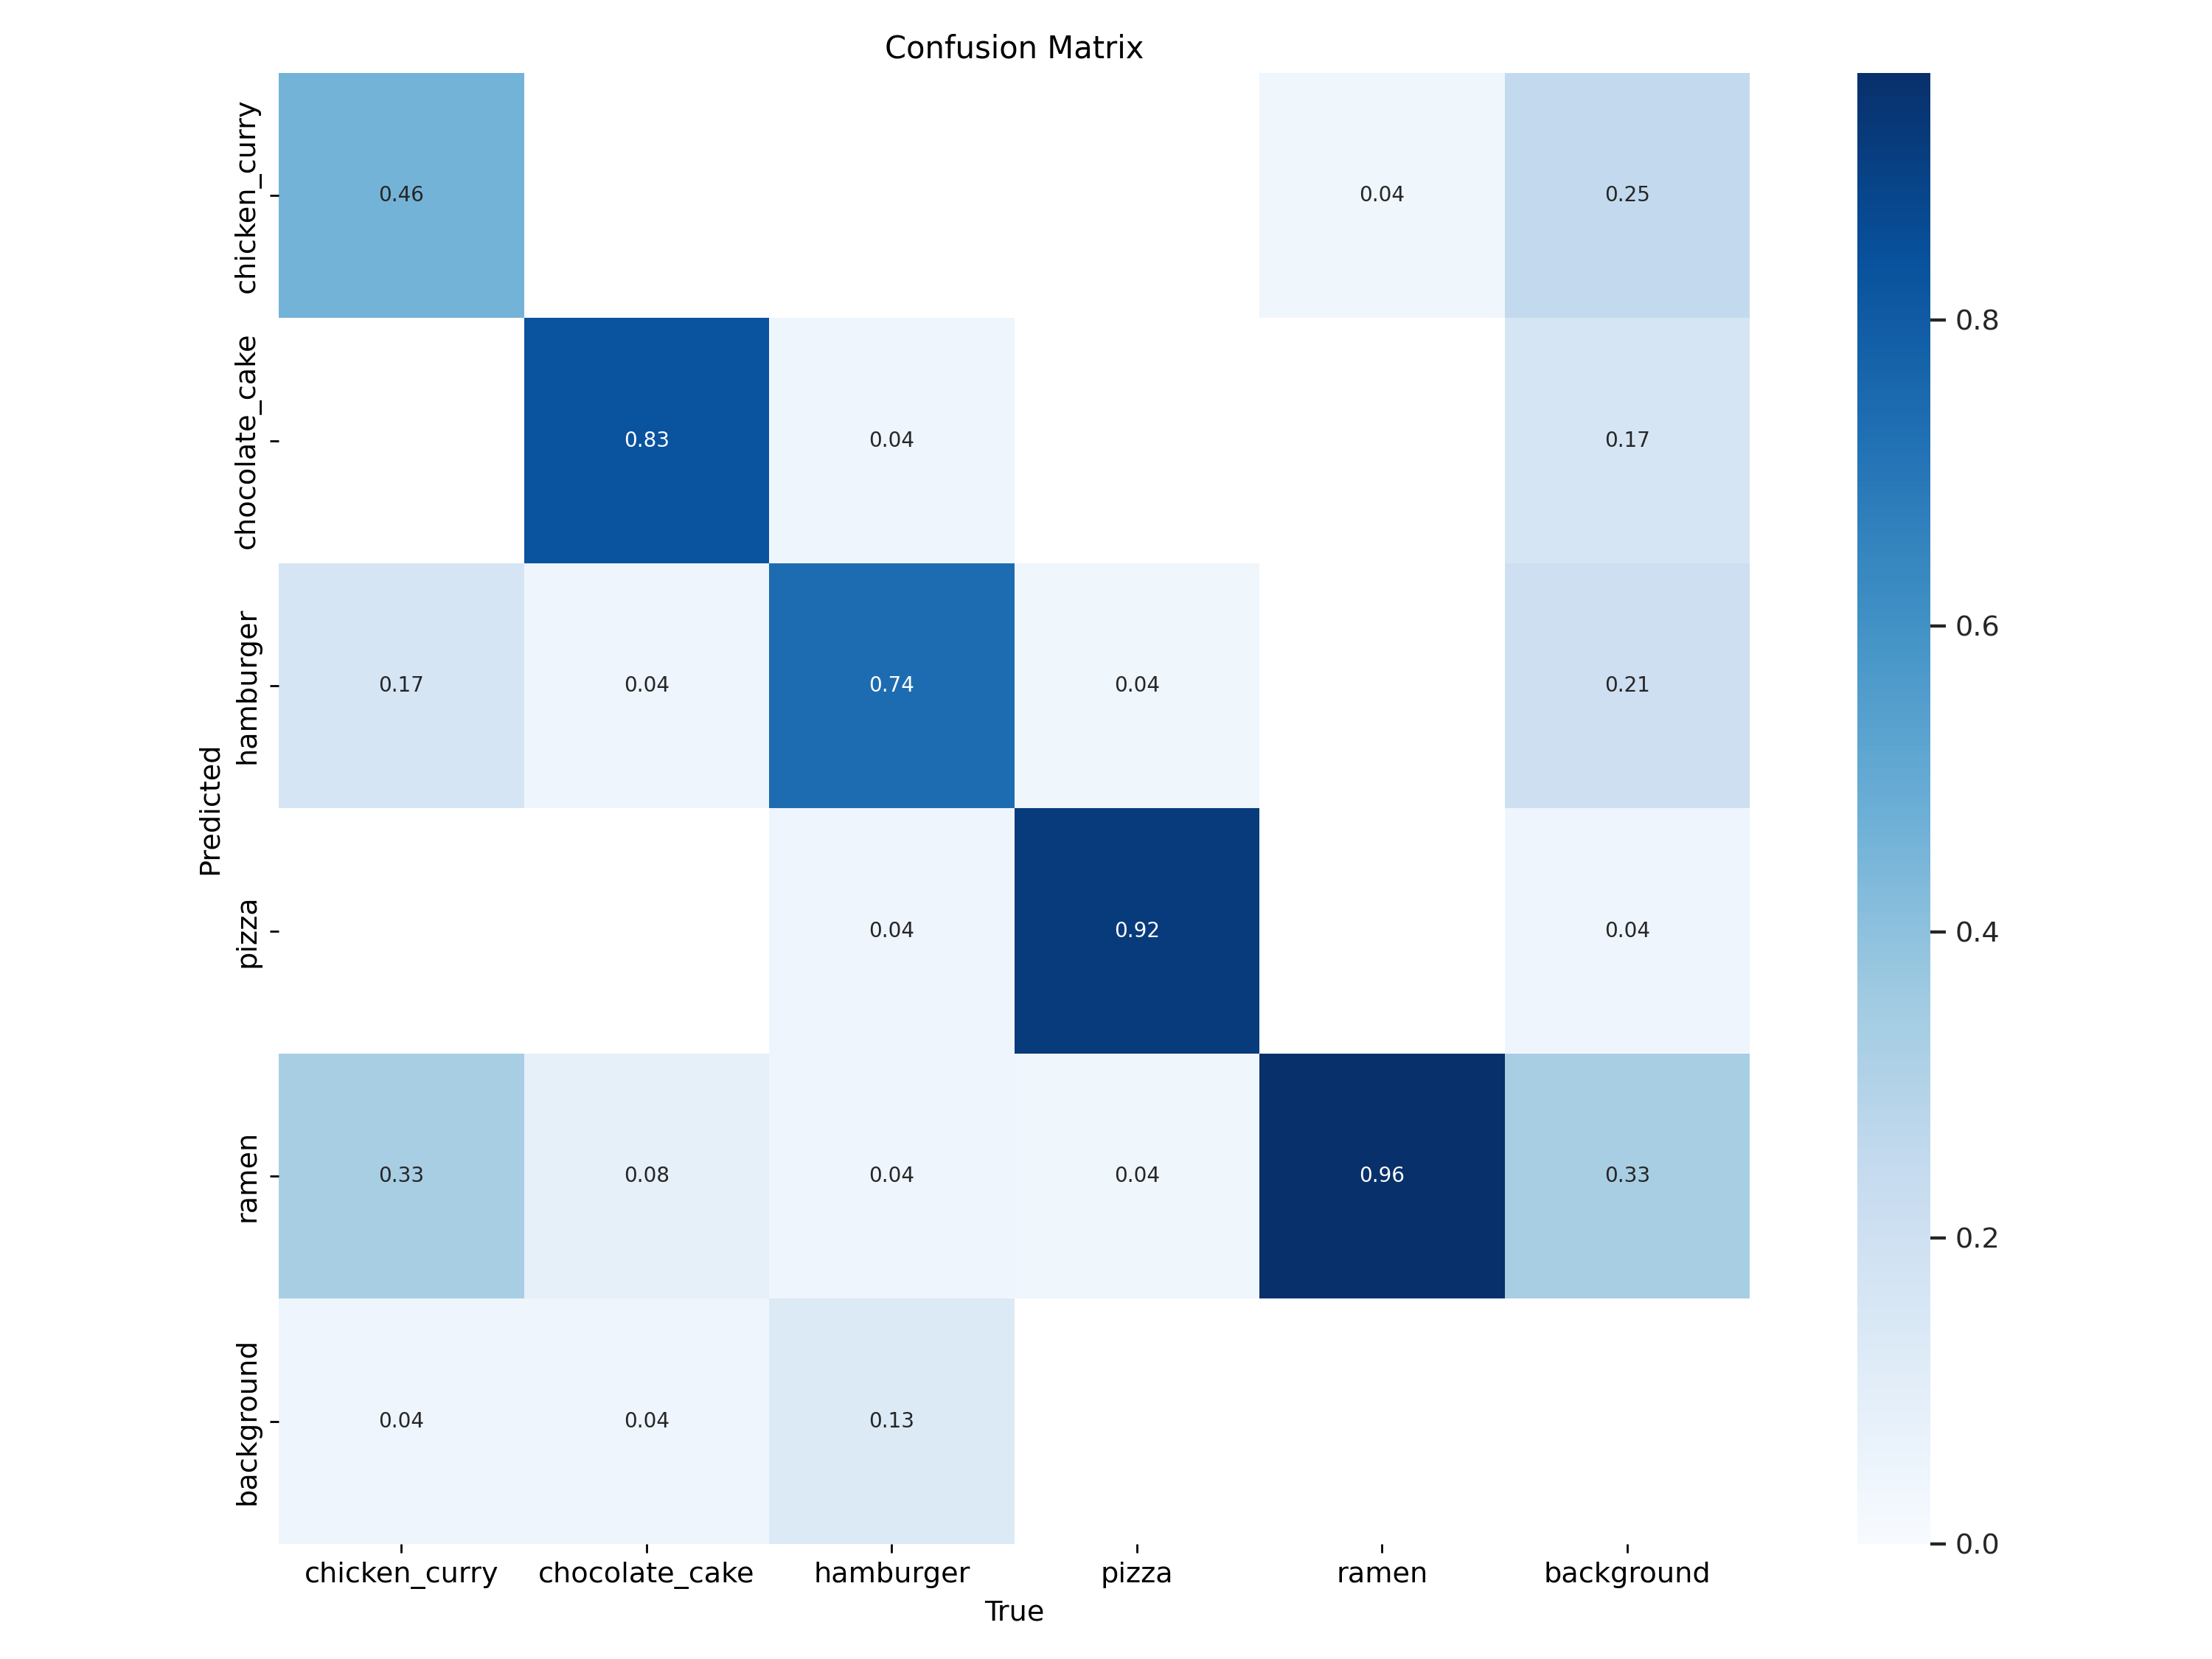

In [17]:
# Visualizing the confusion matrix
Image('train_logs_5class_10percent/exp1_yolov8n_5class_10percent/confusion_matrix.png')

### Experiment No. 2 - Yolov8 Small Model

#### Model Training

In [6]:
# Setting up clearml task
task = Task.init(project_name='food_image_seg', task_name='exp2_yolov8s_5class_10percent')

# Loading the model
model = YOLO('yolov8s-seg.pt')

# Training the yolo model
results = model.train(data='train_config.yaml',
                      imgsz=512, 
                      epochs=200, 
                      patience=20,
                      project='train_logs_5class_10percent',
                      name='exp2_yolov8s_5class_10percent')

# Closing the clearml task
task.close()

ClearML Task: created new task id=805c0ec79cd94299b99456cbb63d0581
ClearML results page: https://app.clear.ml/projects/46d5eb6759034db9b71c9a0c37c982f4/experiments/805c0ec79cd94299b99456cbb63d0581/output/log


  0%|          | 0.00/22.8M [00:00<?, ?B/s]

Ultralytics YOLOv8.0.91 🚀 Python-3.9.16 torch-1.12.1+cu116 CUDA:0 (Quadro P5000, 16279MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=train_config.yaml, epochs=200, patience=20, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=train_logs_5class_10percent, name=exp2_yolov8s_5class_10percent, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False,

      1/200      3.07G      1.097       3.43      3.355      1.443         45        512: 100%|██████████| 21/21 [00:11<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]
                   all        121        122      0.333      0.445      0.416      0.346      0.326      0.437      0.407       0.33

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
      2/200      3.23G     0.8434      1.628      2.082      1.247         43        512: 100%|██████████| 21/21 [00:09<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]
                   all        121        122      0.548      0.613      0.624      0.494      0.518      0.576      0.574      0.462

      E

#### Model Training Result

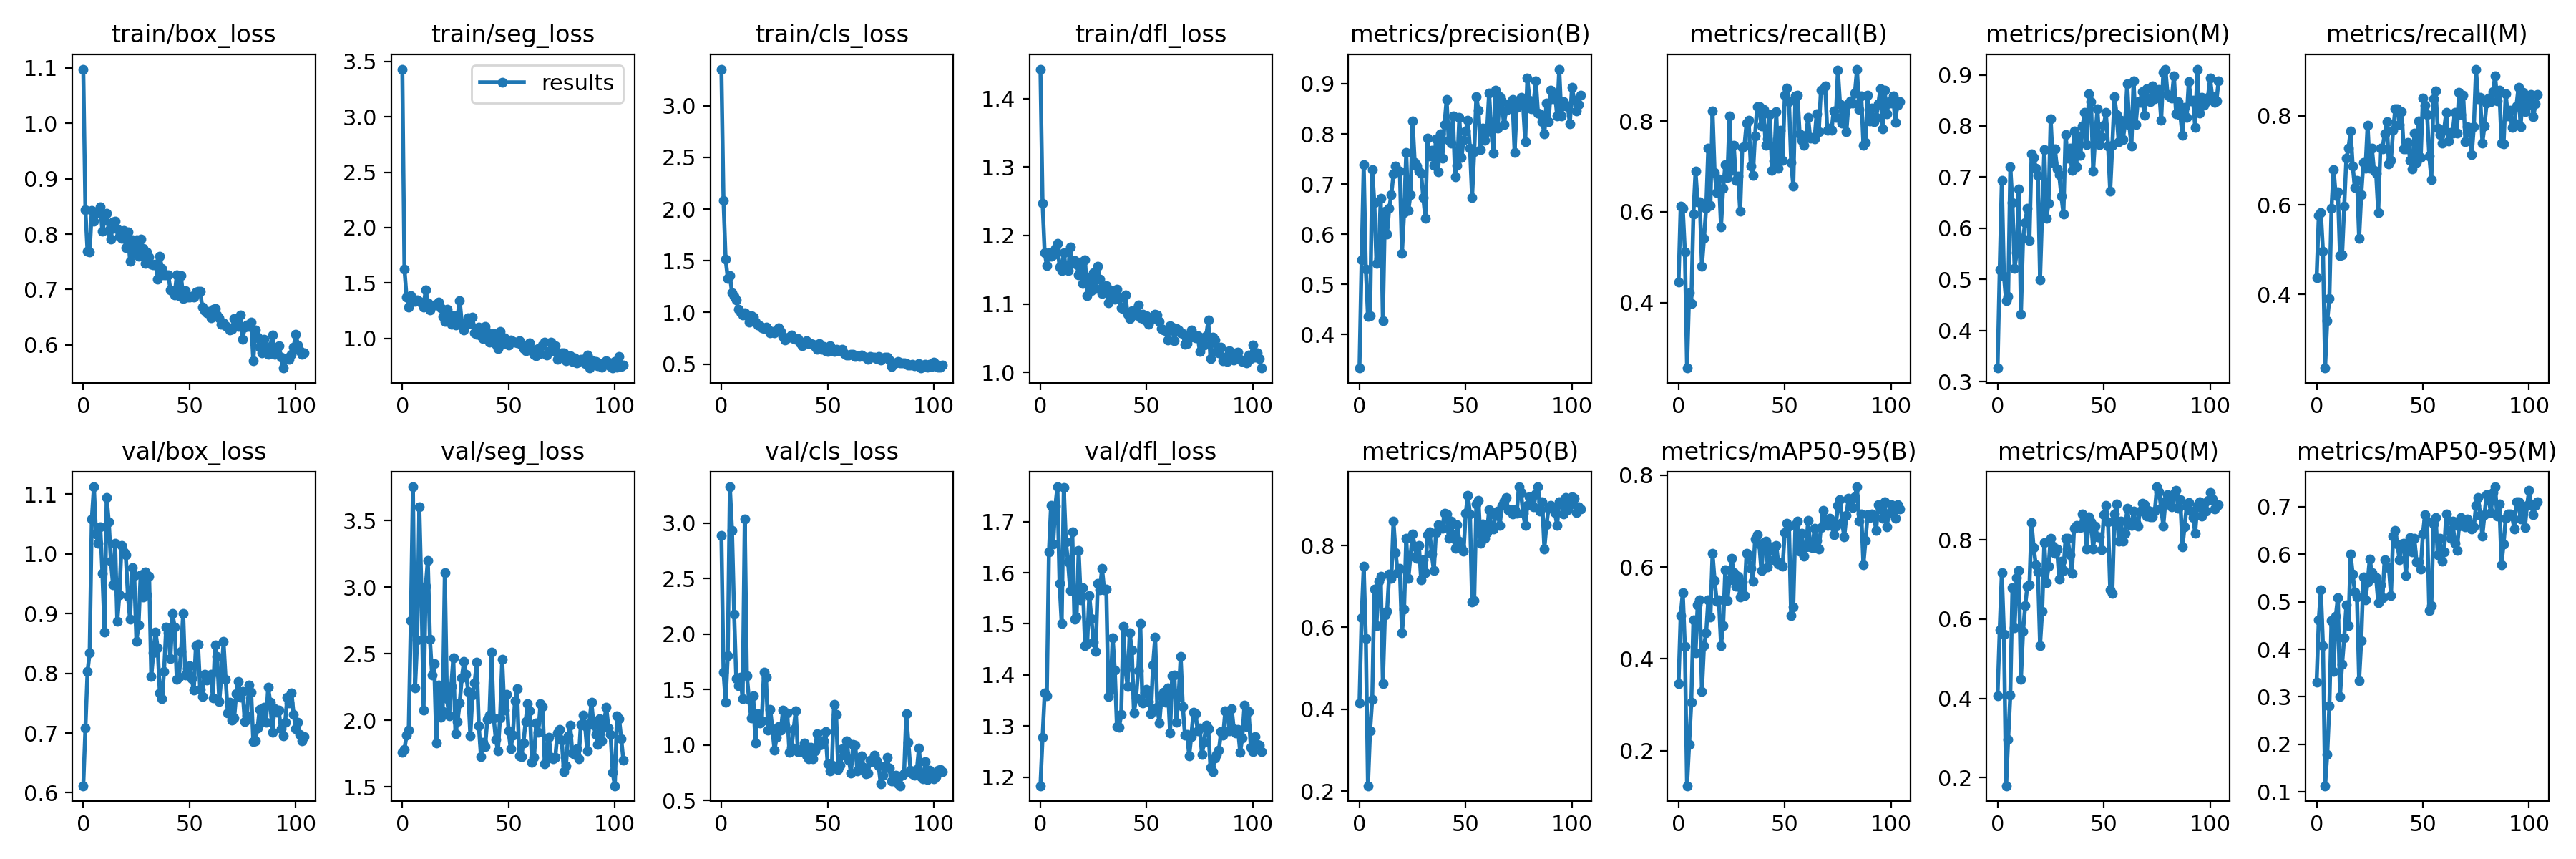

In [19]:
# Visualizing the result image
Image('train_logs_5class_10percent/exp2_yolov8s_5class_10percent/results.png')

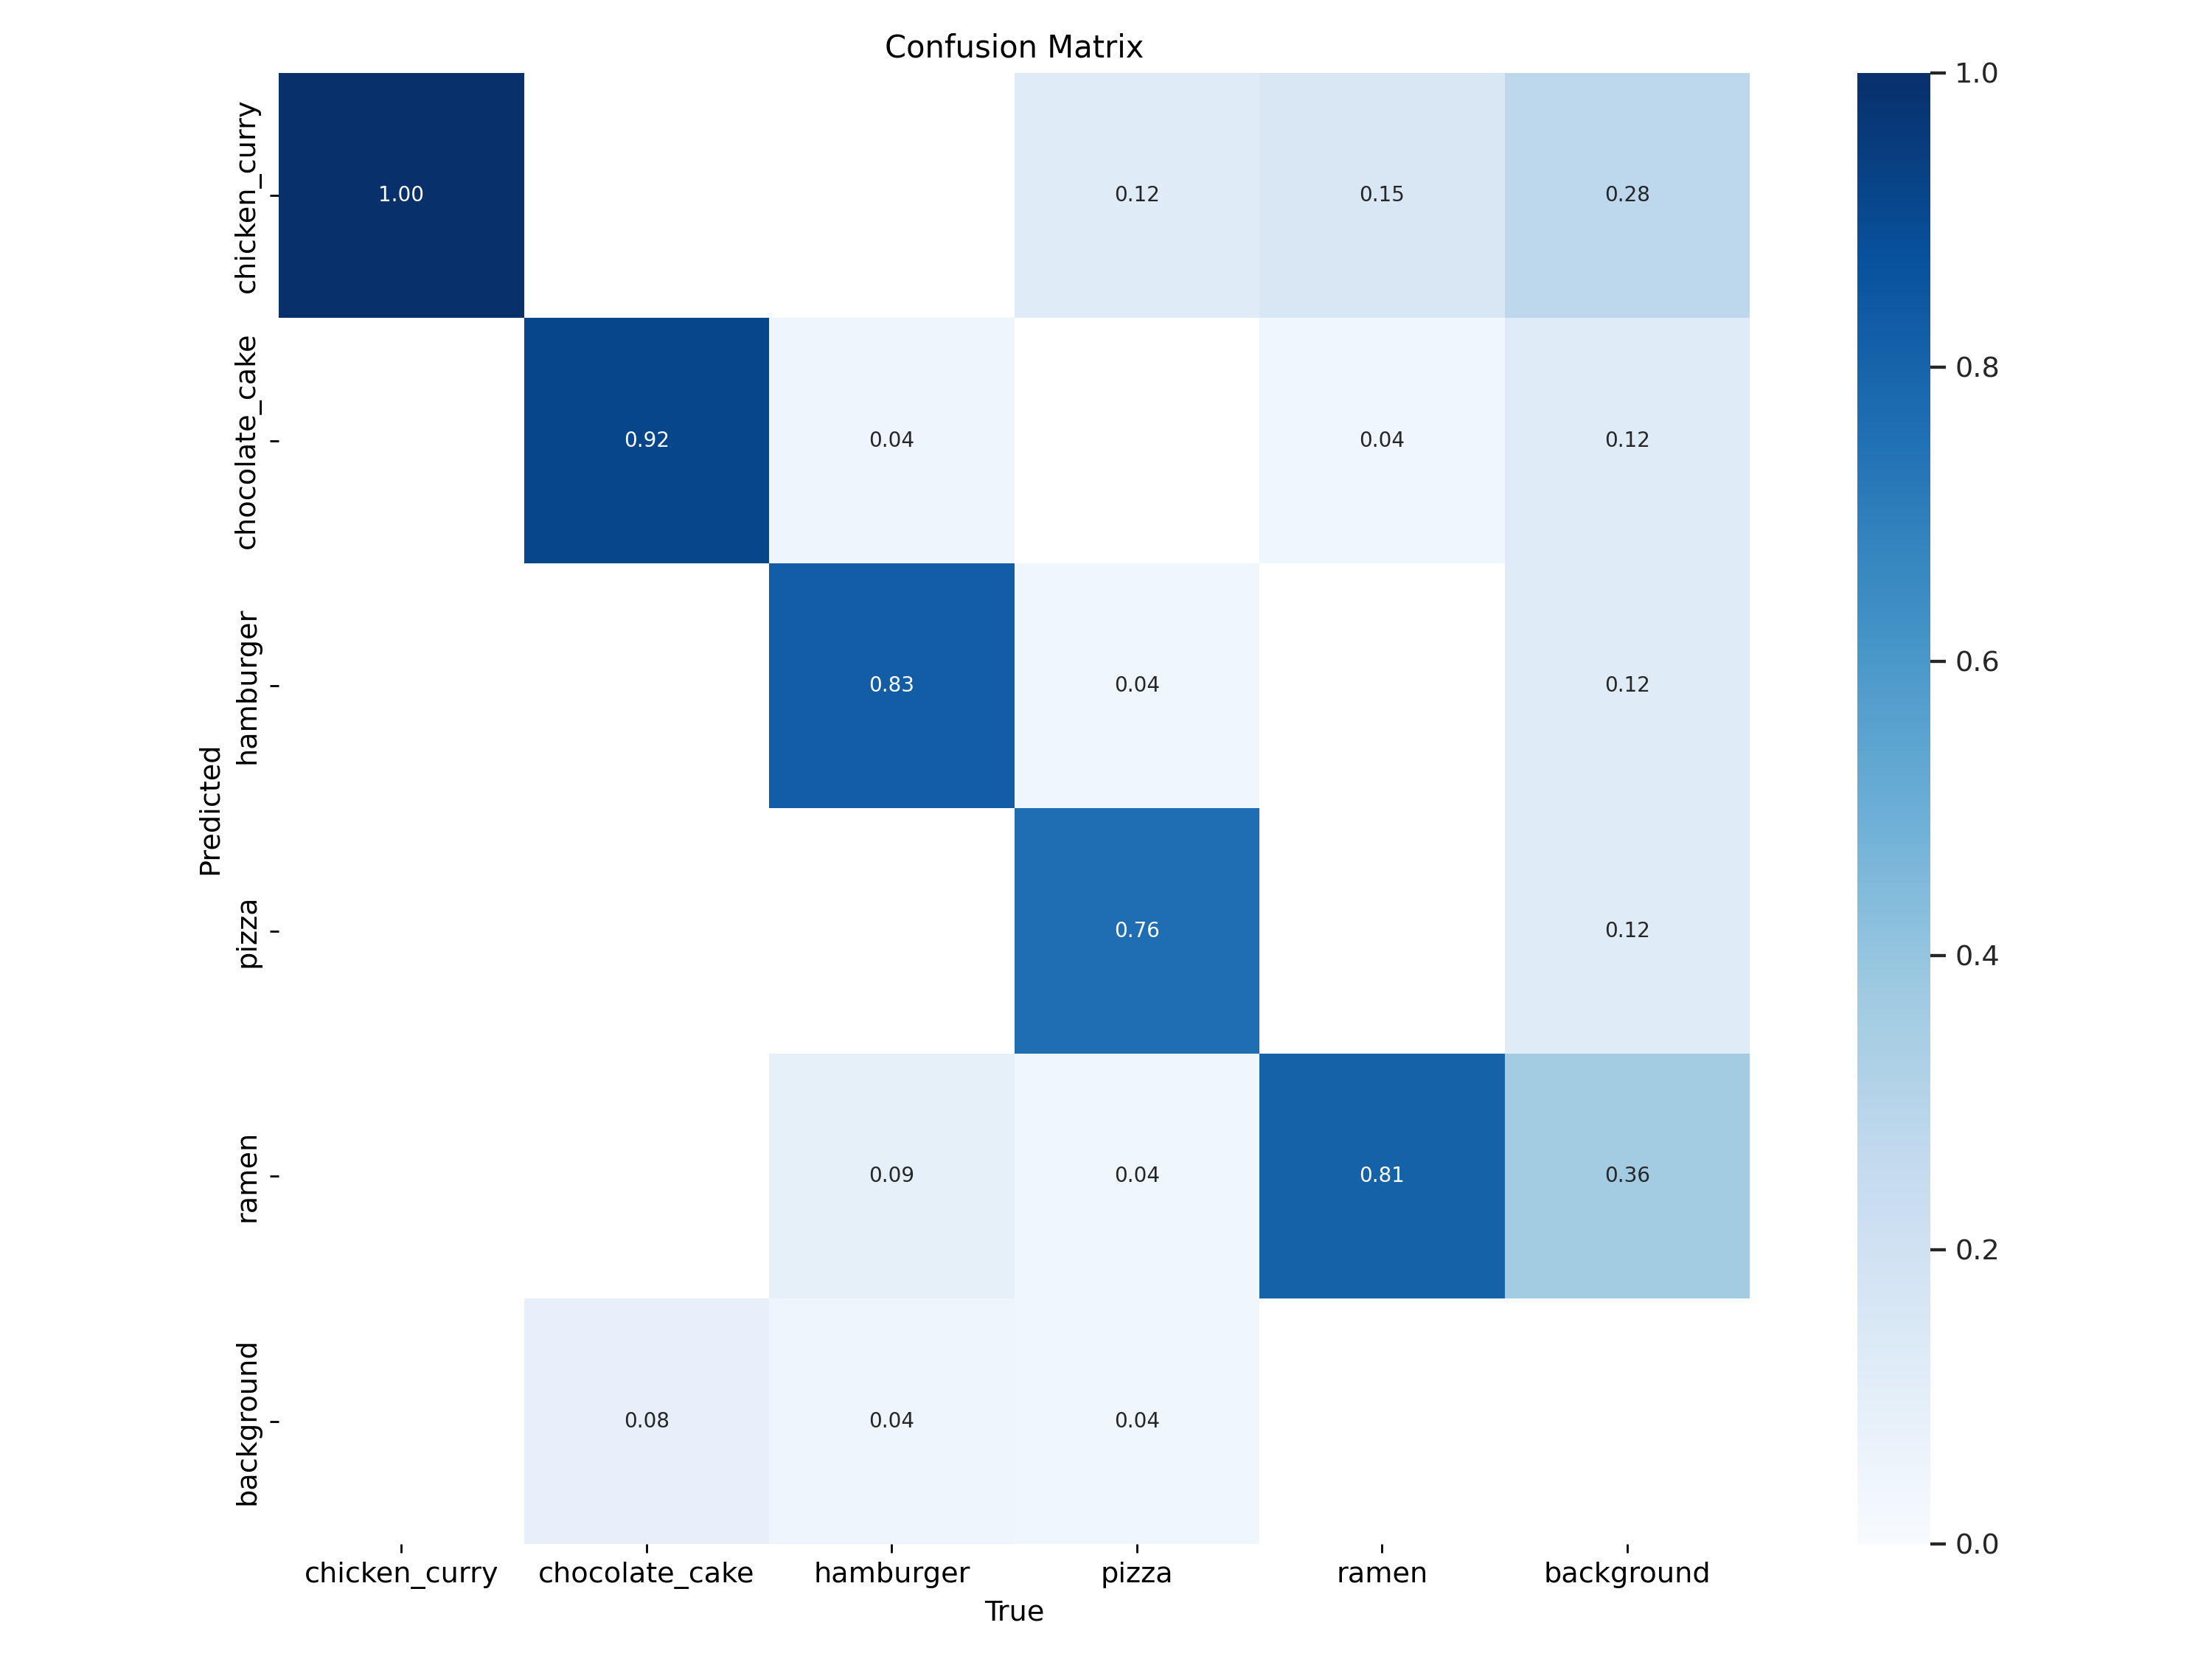

In [18]:
# Visualizing the confusion matrix
Image('train_logs_5class_10percent/exp2_yolov8s_5class_10percent/confusion_matrix.png')

### Experiment No. 3 - Yolov8 Medium Model

#### Model Training

In [7]:
# Setting up clearml task
task = Task.init(project_name='food_image_seg', task_name='exp3_yolov8m_5class_10percent')

# Loading the model
model = YOLO('yolov8m-seg.pt')

# Training the yolo model
results = model.train(data='train_config.yaml',
                      imgsz=512, 
                      epochs=200, 
                      patience=20,
                      project='train_logs_5class_10percent',
                      name='exp3_yolov8m_5class_10percent')

# Closing the clearml task
task.close()

ClearML Task: created new task id=ce1419e576014639b4b6d579aaafd159
ClearML results page: https://app.clear.ml/projects/46d5eb6759034db9b71c9a0c37c982f4/experiments/ce1419e576014639b4b6d579aaafd159/output/log


  0%|          | 0.00/52.4M [00:00<?, ?B/s]

Ultralytics YOLOv8.0.91 🚀 Python-3.9.16 torch-1.12.1+cu116 CUDA:0 (Quadro P5000, 16279MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=train_config.yaml, epochs=200, patience=20, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=train_logs_5class_10percent, name=exp3_yolov8m_5class_10percent, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False,

      1/200      5.15G      1.048      3.045      3.315      1.472         45        512: 100%|██████████| 21/21 [00:20<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]
                   all        121        122      0.306      0.642      0.465      0.375      0.302      0.627      0.455      0.367

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
      2/200      5.27G     0.7872      1.439       1.91      1.253         43        512: 100%|██████████| 21/21 [00:20<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]
                   all        121        122      0.657      0.792      0.729      0.626      0.657      0.792      0.716      0.603

      E

#### Model Training Result

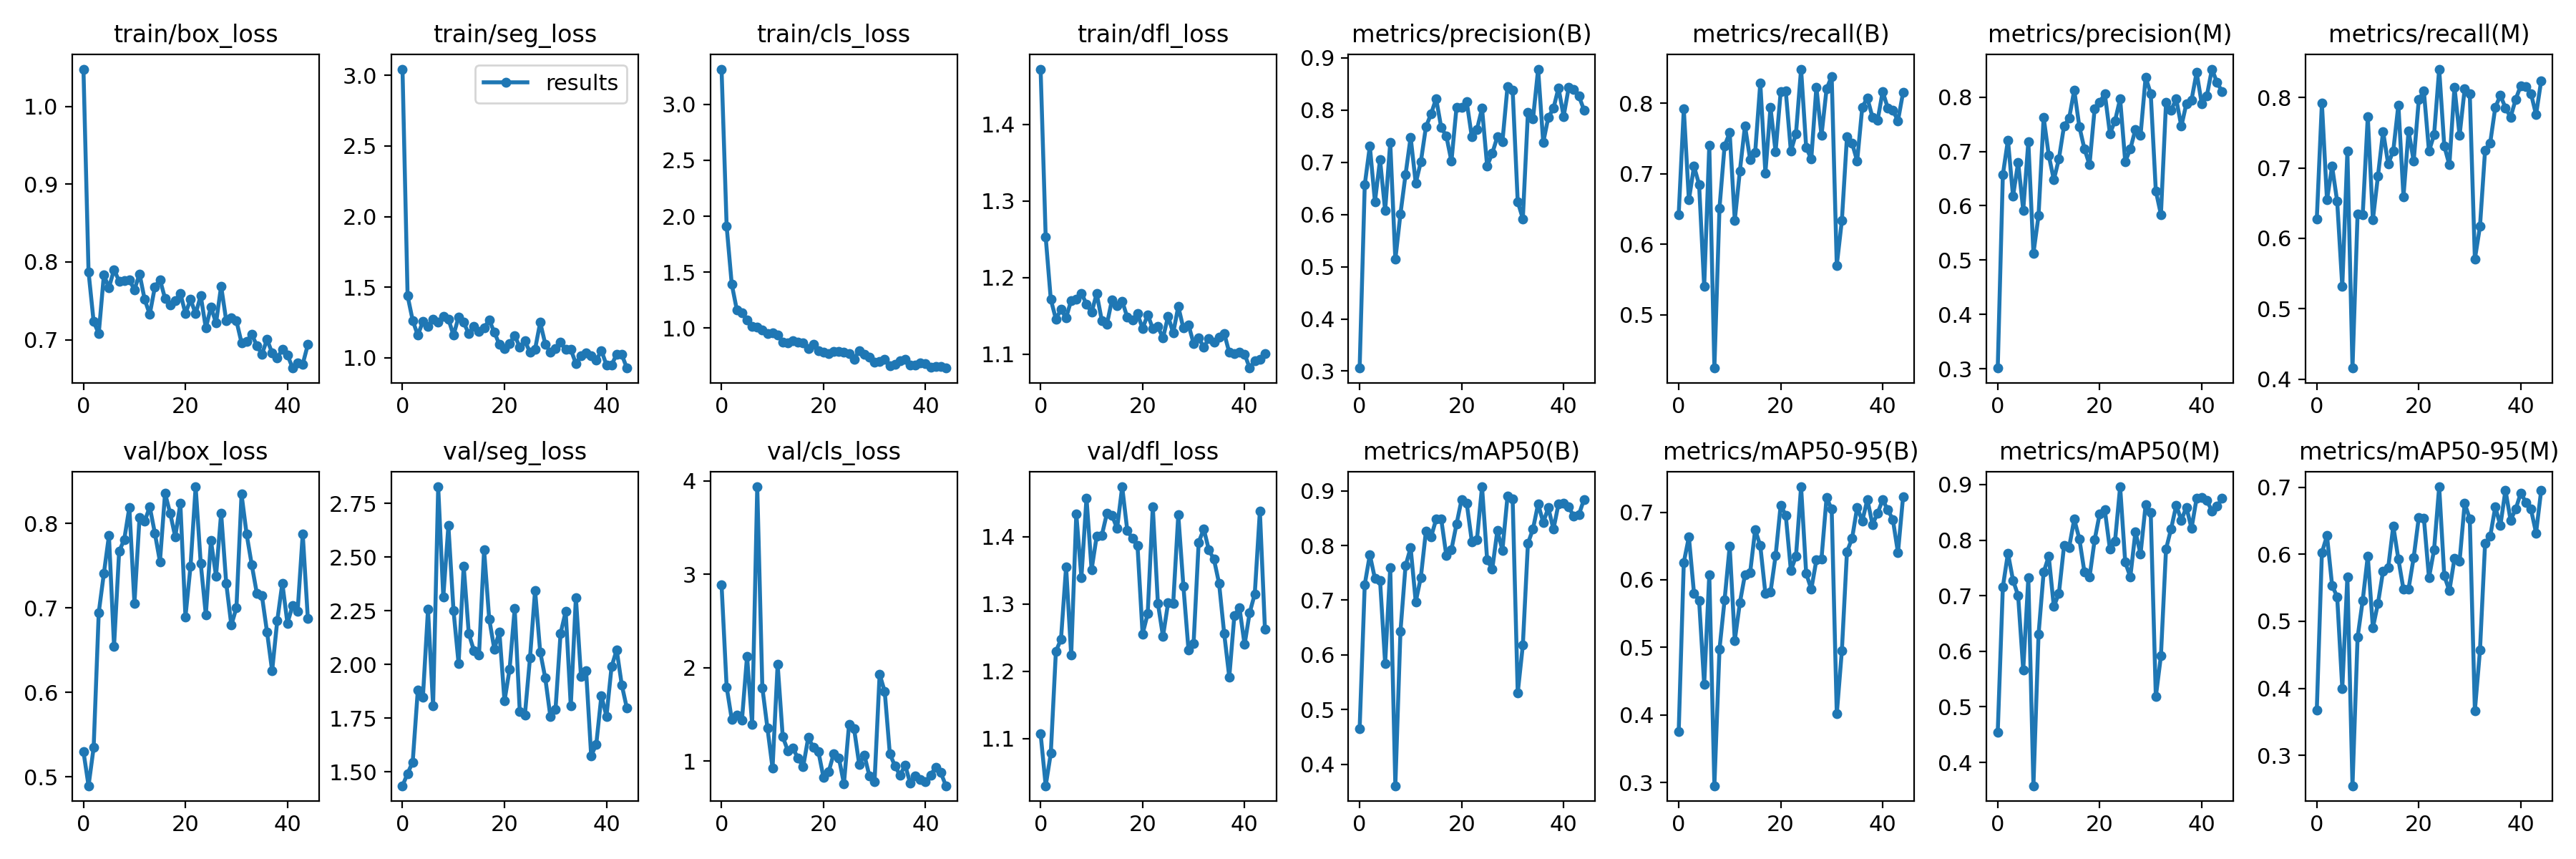

In [20]:
# Visualizing the result image
Image('train_logs_5class_10percent/exp3_yolov8m_5class_10percent/results.png')

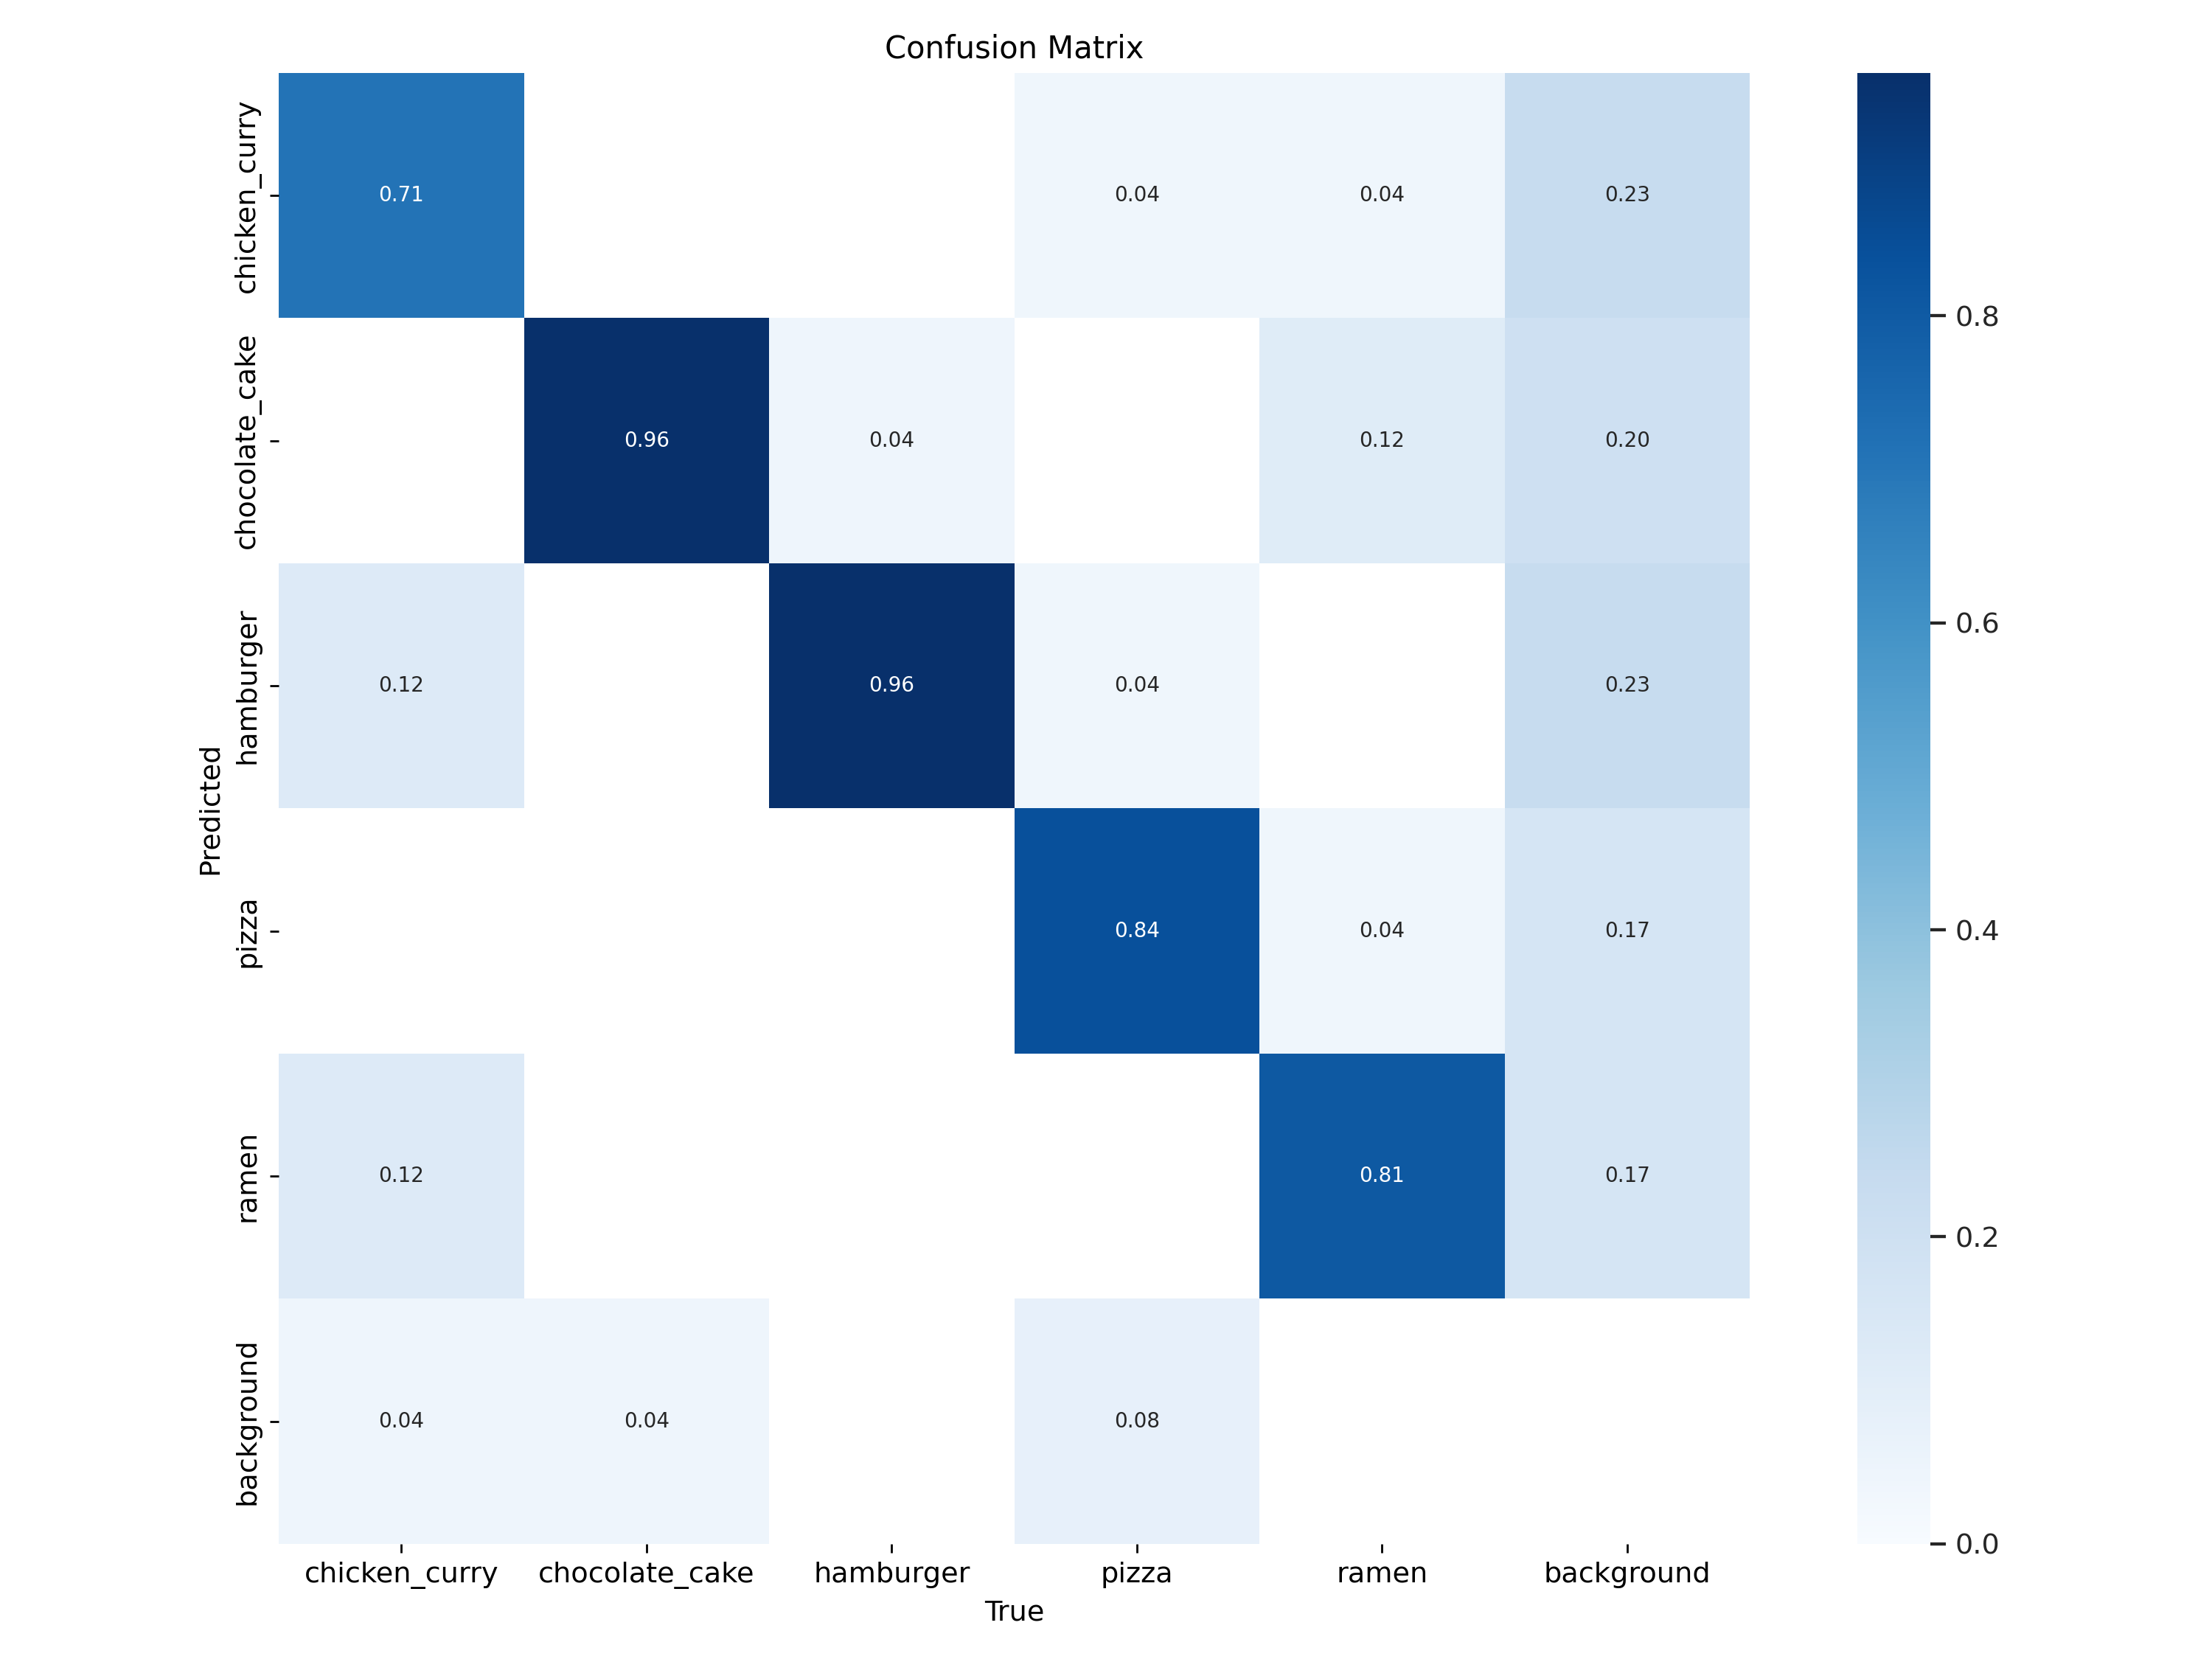

In [21]:
# Visualizing the confusion matrix
Image('train_logs_5class_10percent/exp3_yolov8m_5class_10percent/confusion_matrix.png')